In [2]:
# Importing all libraries that needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read from csv data source
customer_data = pd.read_csv('datasets/customer-data.csv')

In [6]:
# Get 5 of head rows
customer_data.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [7]:
# Retun tuple of number of rows and columns 
customer_data.shape

(10000, 19)

In [8]:
# Return info (column, NN count, Data Type) on dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [9]:
# Return Statistics Infos
customer_data.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [3]:
# Display number missing values per column
customer_data.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [7]:
# Check the mean credit score for each income group
customer_data.groupby(by='income')['credit_score'].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [8]:
# Input missing values with mean credit score for each income group
def input_creditscore(income_classes):
    for income_class in income_classes:      
        # subset of dataframe to use as filter
        filter = customer_data['income'] == income_class
        
        # calculate the mean for each income group
        mean = customer_data[customer_data['income'] == income_class]['credit_score'].mean()
        
        # input the missing values with mean of credit score for each income group
        customer_data.loc[filter,"credit_score"] = customer_data.loc[filter,'credit_score'].fillna(mean)

income_groups = ['poverty','upper class','middle class','working class']
input_creditscore(income_groups)

In [6]:
# check for missing values
customer_data.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [9]:
customer_data.groupby(by='driving_experience')['annual_mileage'].mean()
mean_mileage = customer_data['annual_mileage'].mean()
customer_data['annual_mileage'].fillna(mean_mileage,inplace=True)

/var/folders/9c/b2pc4s7s5lzf03szjw3x5tk40000gn/T/ipykernel_1523/96365246.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['annual_mileage'].fillna(mean_mileage,inplace=True)


In [9]:
customer_data.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [10]:
# Delete id and postal_code columns
customer_data.drop(["id","postal_code"],axis=1,inplace=True)

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  bool   
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  bool   
 10  children             10000 non-null  bool   
 11  annual_mileage       10000 non-null  float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  DUIs                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

Count of customer for gender wise:
 gender
female    5010
male      4990
Name: count, dtype: int64



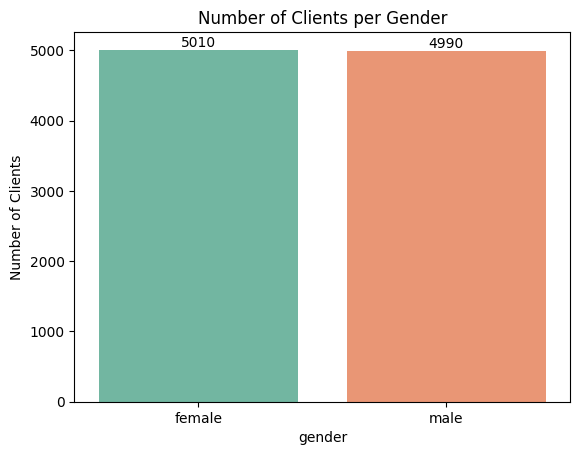

In [18]:
# Check count for each category in the gender column
print(f'Count of customer for gender wise:\n {customer_data['gender'].value_counts()}\n')

# Create a countplot to visualize the count of each category in the gender column
ax=sns.countplot(hue='gender',data=customer_data,x='gender', stat='count', palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Clients per Gender')
plt.ylabel('Number of Clients')
plt.show()

Count of customer for gender education:
 education
high school    4157
university     3928
none           1915
Name: count, dtype: int64



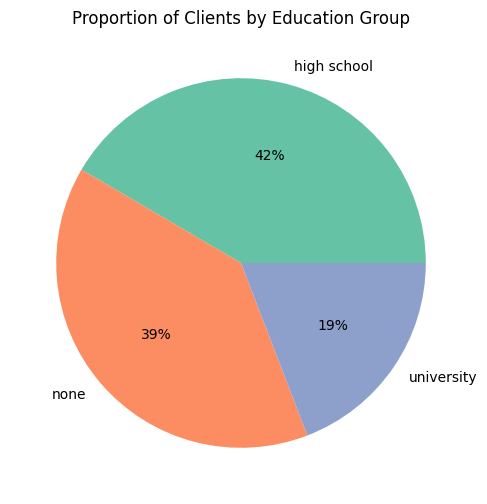

In [21]:
# Categorical orderes: education column

# Check count for each category in the education column
print(f'Count of customer for gender education:\n {customer_data['education'].value_counts()}\n')

# Visualize with pie chart
# Define plot size
plt.figure(figsize=[6,6])

# Define column to use
data = customer_data["education"].value_counts(normalize=True)

# Define labels
labels = np.unique(customer_data['education'])

# Define color palette
colors = sns.color_palette('Set2')

# Create pie chart
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title('Proportion of Clients by Education Group')
plt.show()
